In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

from time import time
from tqdm import tqdm
from IPython.display import display, Latex

### Convenient Likelihood Procedures
In this notebook we present a number of conevenient procedures which can be used to investigate likelihoods $L$ in more detail.

In [2]:
## for convenience we predefined our benchmark scenario
from PreFRBLE.Scenario import scenario_benchmark


## different IGMF models
alphas = np.arange(1,10)/3  ## exponent of B-rho-relation in IGM
models_IGMF = [ 'alpha{}-3rd'.format(i) for i in range(1,10) ] ## model tags



### Plot Contributions
For a given scenario, we can plot the contributions of separate regions.
These are the likelihoods that are convolved to the likelihood of the full scenario.
Convolution is computed by sampling all contributing $L$, where the sample size is the lowest used to obtain the individual $L$.
For RM, in order to allow contributions of different regions to cancel out each other, in computation of convolution, we multiply a random half within each contributing sample by -1.
For the sample, where normalization $<1$, we multiply a corresponding amount of the sample by 0.
This is used to account for the intersection probability with intervening galaxies.
The resulting "full" likelihood $L$ is such the equivalent of a single Monte-Carlo simulation performed using all models, which would be more time consuming if repeated for scenarios with some identical models.

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


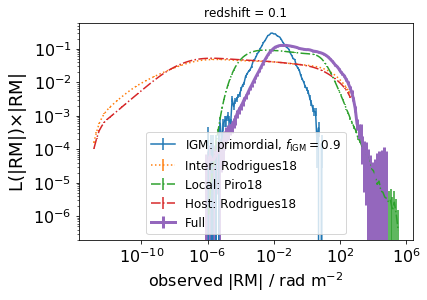

In [3]:
measure='RM'
redshift = 0.1


fig, ax = plt.subplots()

## easily change the identifier of the scenario
scenario_benchmark.redshift = redshift

L = GetLikelihood( measure, scenario_benchmark )

PlotContributions( measure, scenario_benchmark, ax=ax )
L.Plot( ax=ax, lw=3, label='Full')
ax.loglog()
ax.legend(fontsize=12)

More info on how we obtain $L$ for the invidiual models can be found in _notebooks/model/_

### Plot likelihood evolution with redshift
We can plot $L$ for any scenario for increasing redshift.
The computation of full $L$ can take a while, but only has to be done once.
If you want to perfrom these computations on a copmuting cluster that does not allow to use jupyer notebooks, use _ComputeFillLikelihoods.py_ in the main folder)

/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


[]

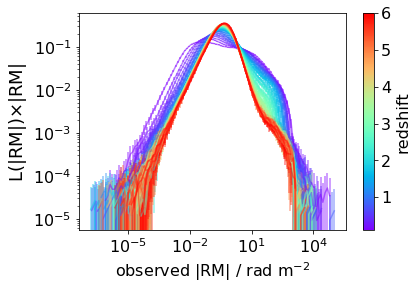

In [4]:
PlotLikelihoodEvolution( measure='RM', deviation=True, scenario=scenario_benchmark)
plt.loglog()


### Redshift Distribution
In order to predict the distribution of measures $M$ observed by telescopes, we have to integrate the redshift evolution of $L(M|z)$ over source redshift $z$, considering the expected distribution of $z$, the prior  $\pi(z)$.
This is determined by the intrinsic redshift distribution of FRBs, which is unknown, as well as selection effects by the observing telescope.
For this purpose, we make use of FRBpoppy (Gardenier et al. 2020), a python code designed to model the FRB population and telescope selection effects (for more details, see _Gardenier20.ipynb_ in _notebooks/model_).
Here we show the assumed intrinsic and resulting expected distribution of $\pi(z)$ according to their best fit scenario.
Competing assumptions can easily be added to the portfolio.

SFR with None peaks at $z \approx 1.9$
coV with None peaks at $z \approx 2.3$
SMD with None peaks at $z \approx 1.0$
SFR with Parkes peaks at $z \approx 1.1$
coV with Parkes peaks at $z \approx 0.7$
SMD with Parkes peaks at $z \approx 0.6$
SFR with CHIME peaks at $z \approx 1.0$
coV with CHIME peaks at $z \approx 0.6$
SMD with CHIME peaks at $z \approx 0.5$
SFR with ASKAP_incoh peaks at $z \approx 0.3$
coV with ASKAP_incoh peaks at $z \approx 0.2$
SMD with ASKAP_incoh peaks at $z \approx 0.2$


/data/prefrble/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/LikelihoodFunction.py:176: RuntimeWarning: divide by zero encountered in power
  self.dev =  ( self.Probability()*N )**-0.5


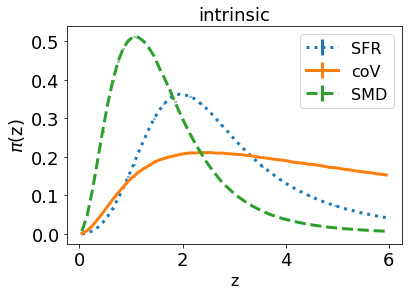

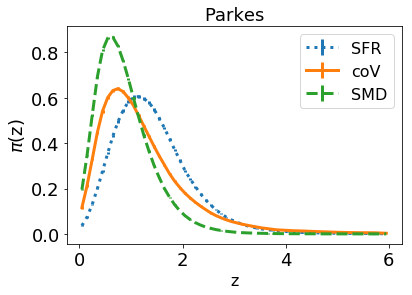

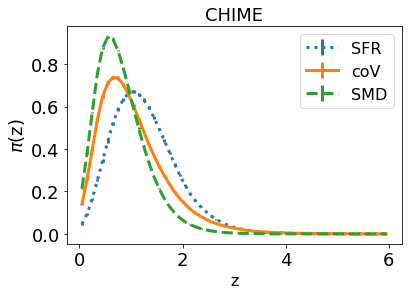

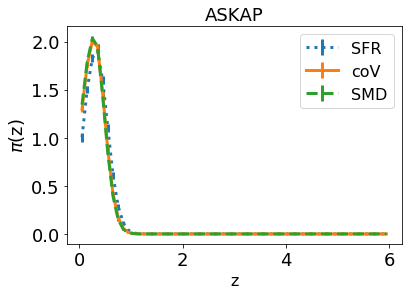

In [5]:

## aesthetics
teles = np.append( 'None', telescopes[::-1] )
colors_teles = np.append( 'black', colors_telescope[::-1] )
colors_teles[1] = 'orange'
colors_teles[2] = 'y'
colors_teles[3] = 'c'

for telescope, color in zip(teles, colors_teles):
    fig, ax = plt.subplots()
    for population, linestyle in zip( populations, linestyles_population ):
        scenario = Scenario( population=population, telescope=telescope )
        L = GetLikelihood( 'z', scenario )
#        P, x, dev = GetLikelihood_Redshift( telescope=telescope, population=population, dev=True )
        if not telescope == 'None':
            L.Smooth()
#            P, x = LikelihoodSmooth( P=P, x=x)
        L.Plot(ax=ax, label=Label(population), linestyle=linestyle, lw=3, density=True)
#        PlotLikelihood( P=P, x=x, dev=dev, label=population, log=True, density=False, measure='z', ax=ax, linestyle=linestyle, lw=3)
        
        ## compute and print peak values
        peak = np.where( L.Probability() == L.Probability().max())[0][0]
        print( r"{} with {} peaks at $z \approx {:.1f}$".format(population, telescope, np.round(L.x[peak],2)) )

    ax.set_title( Label(telescope), fontsize=18 )
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.legend(loc=1, fontsize=16)

### Plot Telescope Likelihoods
Using the prior $\pi(z)$ and the redshift evolution of $L(M|z)$ shown above, we can compute the likelihood for measure $M$ to be observed by terrestrial telescopes
$$
L(M) = \int L(M|z) ~\pi(z) ~\text{d}z .
$$
Here we show a comparison of contribution of individual regions to the observed $M$.
These plots can be used to easily identy the region that dominates observations.

<Figure size 432x288 with 0 Axes>

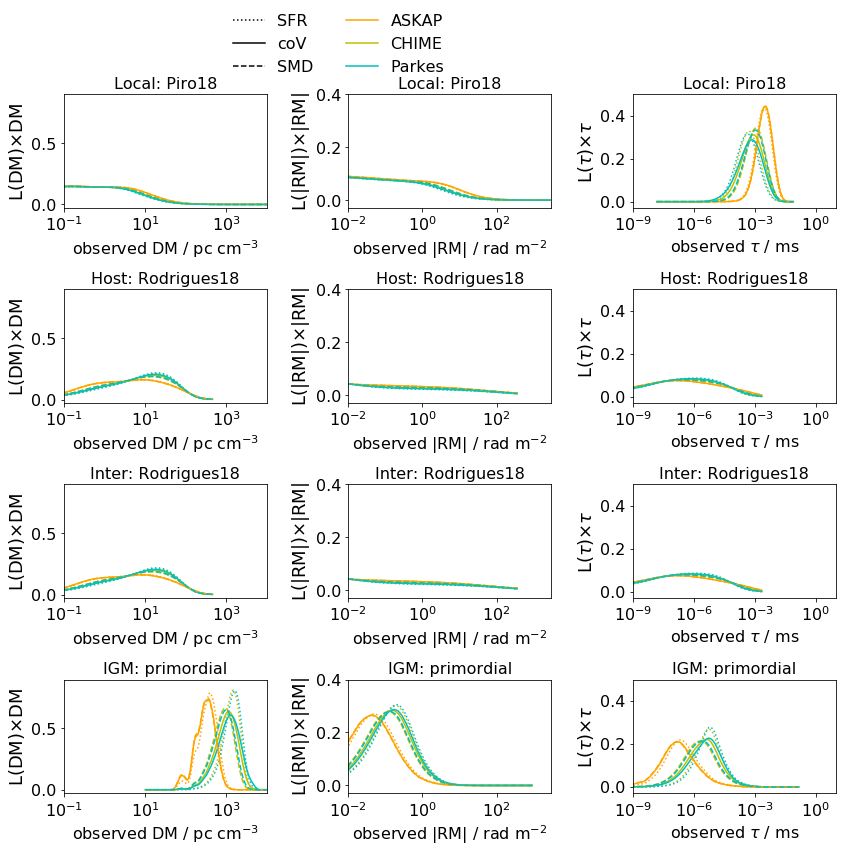

In [6]:
## what should be plotted?
measures = ['DM', 'RM', 'tau']


## which models to plot?
models = [
    { 'Local':['Piro18_wind']},
    { 'Host':['Rodrigues18']},
    { 'Inter':['Rodrigues18']},
    { 'IGM' : ['primordial']},
]

force = False ## set this to True if you made changes to a models/scenarios $P(M|z)$ and have to recompute P(M). Otherwise reads previous results from file to save time.

## for nice legend
handles = []
for population, linestyle in zip( populations, linestyles_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, colors_telescope ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()


## here we start with the actual plot
fig, axs = plt.subplots( len(models) , len(measures), figsize=(4*len(measures), 3*len(models) ), sharex='col', sharey='col' )

for i_m, model in enumerate( models ):
    for population, linestyle in zip( populations, linestyles_population):
        for telescope, color in zip( telescopes, colors_telescope):
            tmp = Scenario( telescope=telescope, population=population, **model )
            for i_v, measure in enumerate( measures ):
                L = GetLikelihood( measure, tmp )
                L.Plot( deviation=False, ax=axs[i_m][i_v], linestyle=linestyle, color=color )
#                PlotTelescope( measure=measure, population=population, telescope=telescope, dev=False, ax=axs[i_m][i_v], scenario=model, linestyle=linestyle, color=color, force=force )
    for ax in axs[i_m]:
        ax.set_title( "{}: {}".format( list(model.keys())[0], Label(list(model.values())[0][0]) ), fontsize=16 )
#        ax.set_title( "{0}: {1}".format( list(model.keys())[0], '/'.join( KeyFull( **model ).split('/')[:-3] ) ), fontsize=16 )

axs[0][0].set_xlim(1e-1,1e4)
axs[0][1].set_xlim(1e-2,3e3)
axs[0][2].set_xlim(1e-9,1e1)
#axs[0][0].set_ylim(1e-5,3)
axs[0][0].set_ylim(-0.03,0.9)
axs[0][1].set_ylim(-0.03,0.4)
axs[0][2].set_ylim(-0.03,0.5)
axs[0][0].set_xscale('log')
axs[0][1].set_xscale('log')
axs[0][2].set_xscale('log')
axs[0][0].set_yscale('linear')
axs[0][1].set_yscale('linear')
axs[0][2].set_yscale('linear')
axs[0][1].legend( handles, populations+[ Label(telescope) for telescope in telescopes], loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

    
plt.tight_layout()
plt.subplots_adjust( wspace=0.4 )
plt.show()

Further, we compare the expected contribution of different IGMF models, that show a reasonable difference in the potentially observable range of $0.1 ~\text{rad m}^{-2} < \text{ RM }_{\text{EG}} < 10 ~\text{rad m}^{-2}$. 

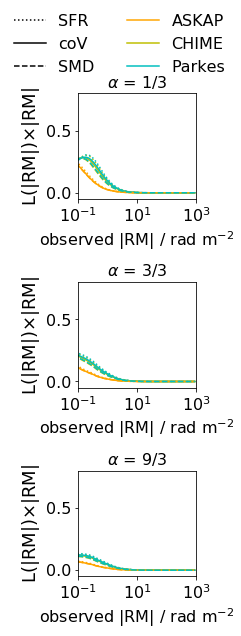

In [7]:

## which IGMF models to compare?
scenarios_IGMF = [
    { 'IGM' : ['alpha1-3rd']},
    { 'IGM' : ['alpha3-3rd']},
    { 'IGM' : ['alpha9-3rd']},
]
cumulative=0

fig, axs = plt.subplots( len( scenarios_IGMF ), 1, figsize=( 4,len( scenarios_IGMF )* 3 ), sharex='all', sharey='all' )

for i_m, model in enumerate( scenarios_IGMF ):
    axs[i_m].set_title( r"$\alpha$ = %s/3" % model['IGM'][0].split('-')[0][-1], fontsize=16 )
    for population, linestyle in zip( populations, linestyles_population ):
        for telescope, color in zip( telescopes, colors_telescope ):
            tmp = Scenario( telescope=telescope, population=population, **model )
            L = GetLikelihood( 'RM', tmp )
            L.Plot( deviation=False, ax=axs[i_m], linestyle=linestyle, color=color, cumulative=cumulative )

#            PlotTelescope( measure='RM', ax=axs[i_m], scenario=model, dev=False, linestyle=linestyle, color=color, force=force, cumulative=cumulative  )

axs[0].legend( handles, populations+[ Label(telescope) for telescope in telescopes], loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_xlim(1e-1,1e3)
axs[0].set_ylim(-0.05,0.8)
axs[0].set_xscale('log')
axs[0].set_yscale('linear')

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()

### Cumulative Plots
We can best see how that shows in the full scenario by plotting the expected complementary cumulative likelihood $L(>M)$.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

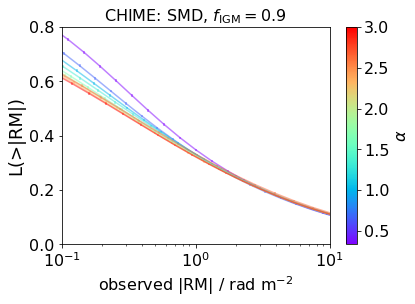

In [8]:
telescope = 'CHIME'
population = 'SMD'


for f_IGM in [.3,.4,.5,.6,.7,.8,.9][-1:]:
    fig,ax1 = plt.subplots()
    colors = list(Rainbow(alphas))[::-1]
    for model in np.array(models_IGMF):
        tmp = Scenario( telescope=telescope, population=population, **scenario_benchmark.Properties( identifier=False ) )
        tmp.IGM = model
        tmp.f_IGM = f_IGM
        color=colors.pop()

        L = GetLikelihood( 'RM', tmp )
        L.Plot( cumulative=-1, ax=ax1, deviation=True, label=Label(model), color=color, alpha=0.5 )
        
        ## compute and print interesting values
        P_cum = L.Cumulative( -1)  ### complementary cumulative 
        P0 = P_cum[np.where(L.x >= 1)[0][0]]  ### choose lowest bin, where all measures are above limit 1 rad m^-2
        P1 = P_cum[np.where(L.x >= 0.1)[0][0]]### limit 0.1 rad m^-2
        display( Latex( r"{}, {:.1f}% are > 1 rad m$^{{-2}}$, while {:.1f}% are > 0.1 rad m$^{{-2}}$".format(Label(model), 100*P0, 100*P1)) )

        
    ax1.set_ylim(0,0.8)
    ax1.set_xlim(0.1, 1e1 )
    ax1.set_xscale('log')
    ax1.set_yscale('linear')
    ax1.set_title( r"{}: {}, $f_{{\rm IGM}} = {}$".format(telescope, population, f_IGM), fontsize=16 )
    Colorbar( alphas, ax=ax1, label=r"$\alpha$" )
    
    plt.show()

### Measurable Likelihood
Obviously, not all $\text{RM}_{\text{EG}}$ predicted by models are accesible to terrestrial telescopes.
We thus want to consider the renormalized $L(\text{RM}_{\text{EG}})$ within measureable range of $\text{RM}_{\text{EG}}$, which can be compared to the subset of FRBs observed with such $\text{RM}_{\text{EG}}$. Currently, the assumed minimum $\text{RM}_{\rm min} = 1 ~\rm rad ~m^{-2}$ is hardcoded in _PreFRBLE.physics.py_.

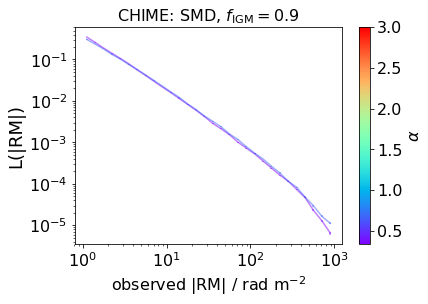

In [13]:

telescope = 'CHIME'
population = 'SMD'

RM_min = 1

L0 = False

for f_IGM in [.3,.4,.5,.6,.7,.8,.9][-1:]:
    fig,ax = plt.subplots()
    colors = list(Rainbow(alphas))[::-1]
    for model in np.array(np.array(models_IGMF)[np.array([1,-1])]):
        tmp = Scenario( telescope=telescope, population=population, **scenario_benchmark.Properties( identifier=False ) )
        tmp.IGM = model
        tmp.f_IGM = f_IGM

        color=colors.pop()
        L = GetLikelihood( 'RM', tmp )
        L.Smooth()
        L.Measureable(min=RM_min, max=1e3,bins=30)
        if not L0:
            L0 = L
        
#        L.P /= L0.P
        
        L.Plot( ax=ax, deviation=True, label=Label(model), color=color, alpha=0.5, density=True )

#    ax.set_ylim(1e-6,0.45)
#    ax.set_xlim(RM_min, 1e2 )
    ax.set_xscale('log')
    ax.set_yscale('log')
#    ax.set_yscale('linear')
    ax.set_title( r"{}: {}, $f_{{\rm IGM}} = {}$".format(telescope, population, f_IGM), fontsize=16 )
    Colorbar( alphas, ax=ax, label=r"$\alpha$" )
    plt.show()